In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

In [14]:
df = pd.read_csv('train_data_twitter2.csv')

df1 = pd.read_csv('test_data_twitter2.csv')

In [15]:
df1.head()

text  label
0                    feel absolutely broke      0
1                  feel hopeless sometimes      0
2                   feel heartbroken right      0
3  cant feel anything numb eating anything      0
4          always feel unloved unimportant      0

In [16]:
df.label.value_counts()

label
0    12972
1    12972
2    12972
3    12972
4    12972
5    12972
Name: count, dtype: int64

In [17]:
df['text'] = df['text'].values.astype('U')
df['label'] = df['label'].astype('int').values
df1['text'] = df1['text'].values.astype('U')
df1['label'] = df1['label'].astype('int').values

In [18]:
train_data = df['text']
train_labels = df['label']
test_data = df1['text']
test_labels = df1['label']

In [19]:
# a. Convert text data into numerical features (Bag of Words)
vectorizer = CountVectorizer()
#x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work
X_train_bow = vectorizer.fit_transform(train_data)
X_test_bow = vectorizer.transform(test_data)

In [20]:
from sklearn.metrics import accuracy_score

# Naive Bayes
nb_classifier = MultinomialNB(alpha=17)
nb_classifier.fit(X_train_bow, train_labels)
nb_predictions = nb_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, nb_predictions)
accuracy

0.8869166666666667

In [21]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=300, solver='liblinear')
lr_classifier.fit(X_train_bow, train_labels)
lr_predictions = lr_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, lr_predictions)
accuracy

0.91125

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_bow, train_labels)
dt_predictions = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, dt_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.871


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_bow, train_labels)
rf_predictions = rf_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8965833333333333


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# k-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_bow, train_labels)
knn_predictions = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, knn_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7328333333333333


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)
svm_classifier.fit(X_train_bow, train_labels)
svm_predictions = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8985833333333333


In [26]:
# Evaluate Naive Bayes
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')

# Print or store the evaluation metrics
print("Naive Bayes Metrics:")
print("F1-Score:", nb_f1)
print("Recall:", nb_recall)
print("Precision:", nb_precision)

Naive Bayes Metrics:
F1-Score: 0.8861081430433463
Recall: 0.8869166666666667
Precision: 0.8894754865599916


In [27]:
# Evaluate Logistic Regression
lr_f1 = f1_score(test_labels, lr_predictions, average='weighted')
lr_recall = recall_score(test_labels, lr_predictions, average='weighted')
lr_precision = precision_score(test_labels, lr_predictions, average='weighted')

print("\nLogistic Regression Metrics:")
print("F1-Score:", lr_f1)
print("Recall:", lr_recall)
print("Precision:", lr_precision)


Logistic Regression Metrics:
F1-Score: 0.9109766621093742
Recall: 0.91125
Precision: 0.9118886921520143


In [28]:
# Evaluate Decision Tree
dt_f1 = f1_score(test_labels, dt_predictions, average='weighted')
dt_recall = recall_score(test_labels, dt_predictions, average='weighted')
dt_precision = precision_score(test_labels, dt_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nDecision Tree Metrics:")
print("F1-Score:", dt_f1)
print("Recall:", dt_recall)
print("Precision:", dt_precision)


Decision Tree Metrics:
F1-Score: 0.871065147054589
Recall: 0.871
Precision: 0.8712511093731897


In [29]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nRandom Forest Metrics:")
print("F1-Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)


Random Forest Metrics:
F1-Score: 0.8964571421777975
Recall: 0.8965833333333333
Precision: 0.8972713425667521


In [30]:
# Evaluate k-NN
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nk-Nearest Neighbors (k-NN) Metrics:")
print("F1-Score:", knn_f1)
print("Recall:", knn_recall)
print("Precision:", knn_precision)


k-Nearest Neighbors (k-NN) Metrics:
F1-Score: 0.7319565280723118
Recall: 0.7328333333333333
Precision: 0.7340504536497462


In [31]:
# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')


# Print or store the evaluation metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("F1-Score:", svm_f1)
print("Recall:", svm_recall)
print("Precision:", svm_precision)


Support Vector Machine (SVM) Metrics:
F1-Score: 0.8983440419120604
Recall: 0.8985833333333333
Precision: 0.8990610968358107


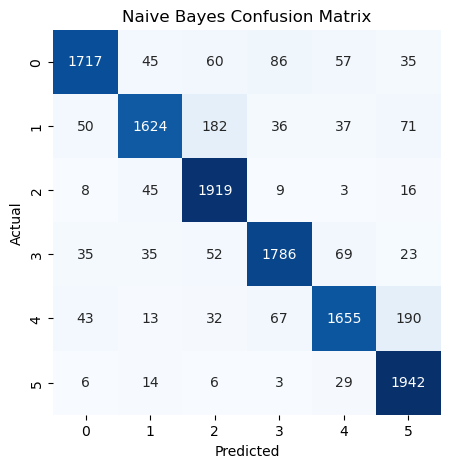

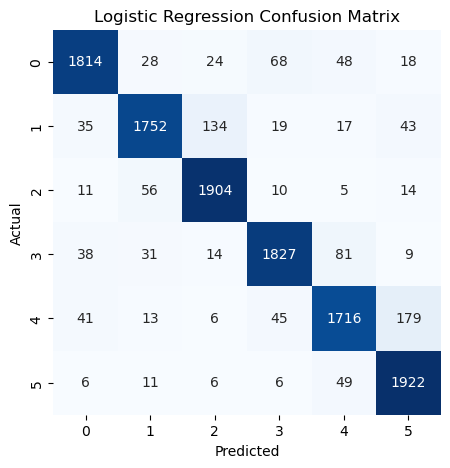

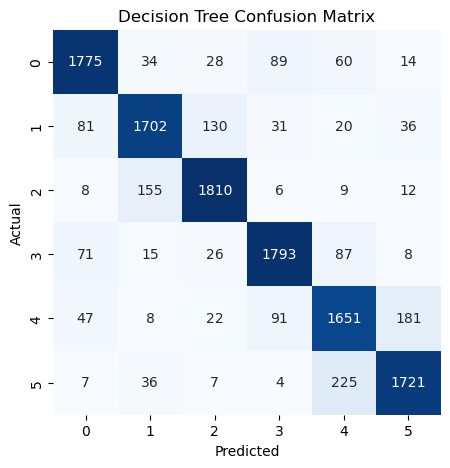

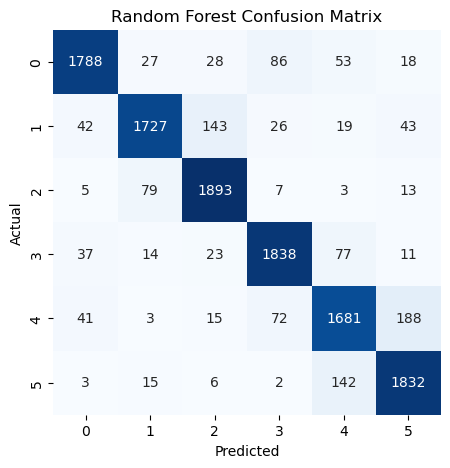

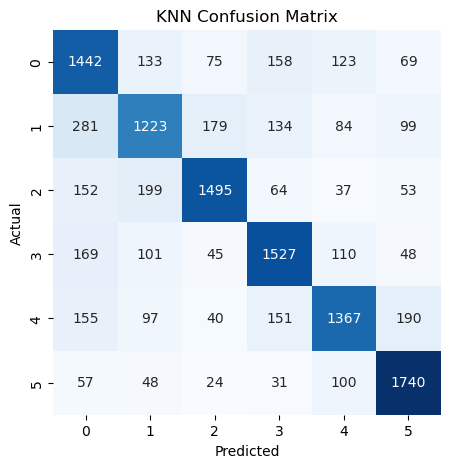

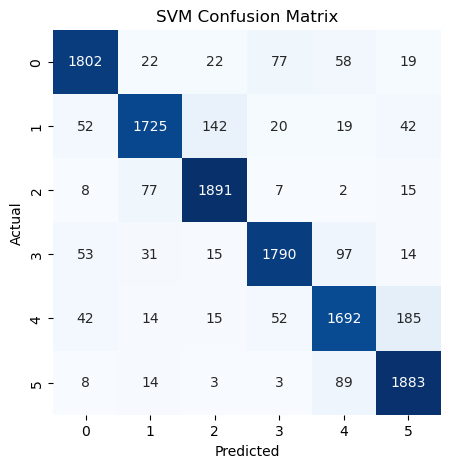

In [32]:
# Visualize results using confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_labels, nb_predictions, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(test_labels, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(test_labels, dt_predictions, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(test_labels, knn_predictions, 'KNN Confusion Matrix')
plot_confusion_matrix(test_labels, svm_predictions, 'SVM Confusion Matrix')

In [33]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, nb_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.88764695 0.88822509 0.88866761 0.88763973 0.88706154]
Mean Accuracy: 0.8878481835791211


In [34]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, lr_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.91411319 0.91192908 0.91648465 0.91140948 0.91699859]
Mean Accuracy: 0.9141869967587188


In [35]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, dt_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.87531316 0.87049528 0.87716819 0.87337787 0.8774894 ]
Mean Accuracy: 0.8747687805673785


In [36]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, rf_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90165093 0.89805357 0.90035976 0.89682642 0.90235128]
Mean Accuracy: 0.899848391307939


In [37]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, knn_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.7226826  0.72114087 0.7125787  0.72067326 0.7246563 ]
Mean Accuracy: 0.7203463468653124


In [38]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(vectorizer, svm_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90152245 0.90030192 0.9029937  0.89823975 0.9043428 ]
Mean Accuracy: 0.9014801256023117


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = tfidf_vectorizer.fit_transform(train_data)

# Transform the test data
X_test_bow = tfidf_vectorizer.transform(test_data)

In [40]:
from sklearn.metrics import accuracy_score

# Task 3: Implementation of Sentiment Analysis

# Naive Bayes
nb_classifier = MultinomialNB(alpha=17)
nb_classifier.fit(X_train_bow, train_labels)
nb_predictions = nb_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, nb_predictions)
accuracy

0.8945

In [41]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=300, solver='liblinear')
lr_classifier.fit(X_train_bow, train_labels)
lr_predictions = lr_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, lr_predictions)
accuracy

0.9126666666666666

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_bow, train_labels)
dt_predictions = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, dt_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8675833333333334


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_bow, train_labels)
rf_predictions = rf_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.89525


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# k-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_bow, train_labels)
knn_predictions = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, knn_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.39841666666666664


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)
svm_classifier.fit(X_train_bow, train_labels)
svm_predictions = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9145833333333333


In [46]:
# Evaluate Naive Bayes
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')

# Print or store the evaluation metrics
print("Naive Bayes Metrics:")
print("F1-Score:", nb_f1)
print("Recall:", nb_recall)
print("Precision:", nb_precision)

Naive Bayes Metrics:
F1-Score: 0.8939386036013599
Recall: 0.8945
Precision: 0.8961565523433916


In [47]:
# Evaluate Logistic Regression
lr_f1 = f1_score(test_labels, lr_predictions, average='weighted')
lr_recall = recall_score(test_labels, lr_predictions, average='weighted')
lr_precision = precision_score(test_labels, lr_predictions, average='weighted')

print("\nLogistic Regression Metrics:")
print("F1-Score:", lr_f1)
print("Recall:", lr_recall)
print("Precision:", lr_precision)


Logistic Regression Metrics:
F1-Score: 0.9122901403820717
Recall: 0.9126666666666666
Precision: 0.913450137900324


In [48]:
# Evaluate Decision Tree
dt_f1 = f1_score(test_labels, dt_predictions, average='weighted')
dt_recall = recall_score(test_labels, dt_predictions, average='weighted')
dt_precision = precision_score(test_labels, dt_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nDecision Tree Metrics:")
print("F1-Score:", dt_f1)
print("Recall:", dt_recall)
print("Precision:", dt_precision)


Decision Tree Metrics:
F1-Score: 0.867604580885702
Recall: 0.8675833333333334
Precision: 0.8677499968357033


In [49]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nRandom Forest Metrics:")
print("F1-Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)


Random Forest Metrics:
F1-Score: 0.8951086484606552
Recall: 0.89525
Precision: 0.8966084282352186


In [50]:
# Evaluate k-NN
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nk-Nearest Neighbors (k-NN) Metrics:")
print("F1-Score:", knn_f1)
print("Recall:", knn_recall)
print("Precision:", knn_precision)


k-Nearest Neighbors (k-NN) Metrics:
F1-Score: 0.4160841878693603
Recall: 0.39841666666666664
Precision: 0.7510632577009071


In [51]:
# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')

# Print or store the evaluation metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("F1-Score:", svm_f1)
print("Recall:", svm_recall)
print("Precision:", svm_precision)


Support Vector Machine (SVM) Metrics:
F1-Score: 0.9141155876092172
Recall: 0.9145833333333333
Precision: 0.9165752014004356


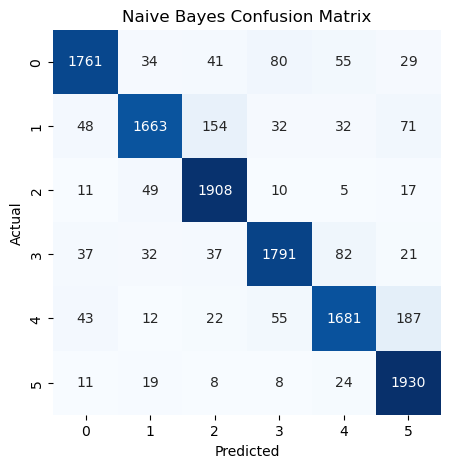

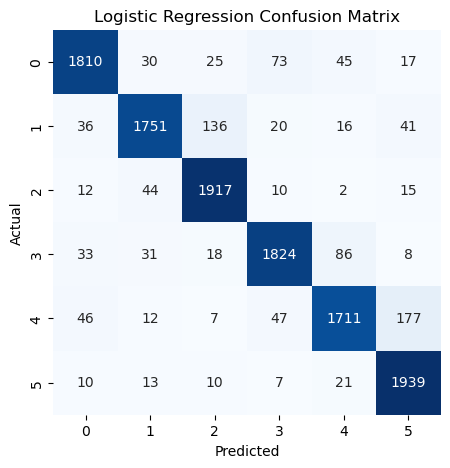

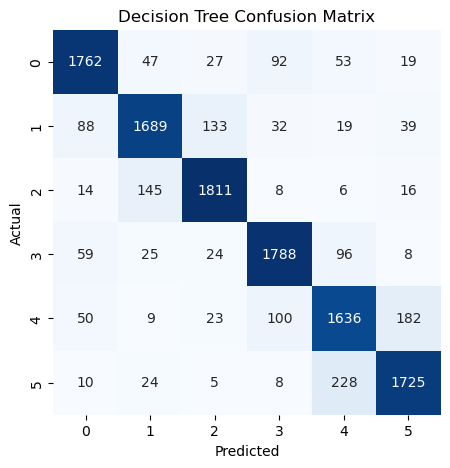

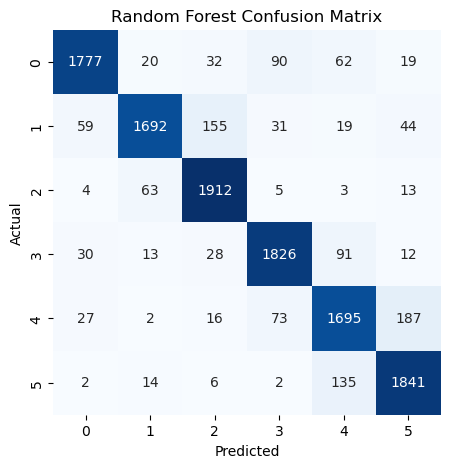

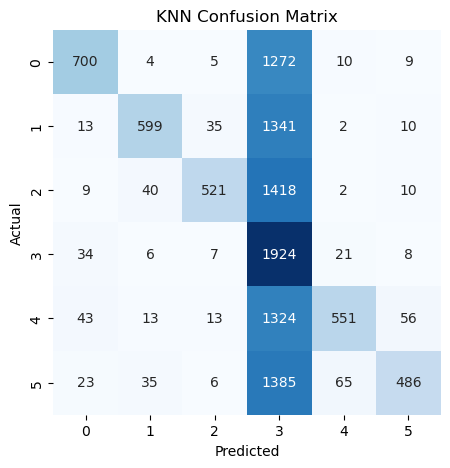

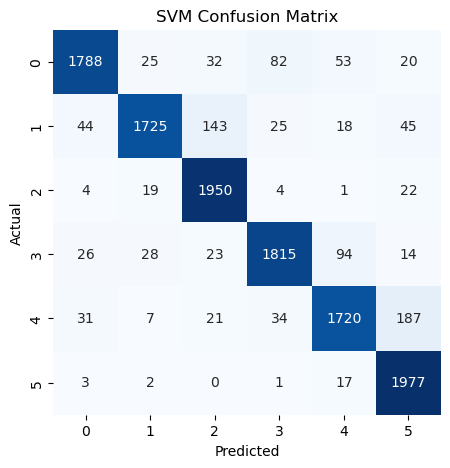

In [52]:
# Visualize results using confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_labels, nb_predictions, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(test_labels, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(test_labels, dt_predictions, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(test_labels, knn_predictions, 'KNN Confusion Matrix')
plot_confusion_matrix(test_labels, svm_predictions, 'SVM Confusion Matrix')

In [53]:
print("Unique values in true labels:", set(test_labels))
print("Unique values in predicted labels:", set(lr_predictions))

Unique values in true labels: {0, 1, 2, 3, 4, 5}
Unique values in predicted labels: {0, 1, 2, 3, 4, 5}


In [54]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, nb_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89554828 0.89516284 0.89868945 0.8969549  0.89676217]
Mean Accuracy: 0.8966235293444729


In [55]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, lr_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.915141   0.91443438 0.91783374 0.91404343 0.91892586]
Mean Accuracy: 0.9160756832149065


In [56]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, dt_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.87293634 0.86696216 0.87209302 0.86997302 0.87479121]
Mean Accuracy: 0.8713511512462645


In [57]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, rf_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90030192 0.89985225 0.9017731  0.89907491 0.90119491]
Mean Accuracy: 0.9004394172661918


In [58]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, knn_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.39179033 0.38825721 0.4043428  0.3878967  0.38648336]
Mean Accuracy: 0.3917540787930559


In [59]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, svm_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9154622  0.9134708  0.91661313 0.91442888 0.91757677]
Mean Accuracy: 0.9155103567647528


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load your dataset
df_train = pd.read_csv('train_data_twitter2.csv')
df_train['text'] = df_train['text'].values.astype('U')

X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')
df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Convert text data to Bag-of-Words representation
vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Epoch 1/5


609/609 [==============================] - 33s 48ms/step - loss: 0.5262 - accuracy: 0.8210 - val_loss: 0.2616 - val_accuracy: 0.9100
Epoch 2/5
609/609 [==============================] - 28s 47ms/step - loss: 0.2092 - accuracy: 0.9266 - val_loss: 0.2599 - val_accuracy: 0.9100
Epoch 3/5
609/609 [==============================] - 27s 44ms/step - loss: 0.1541 - accuracy: 0.9426 - val_loss: 0.3019 - val_accuracy: 0.9082
Epoch 4/5
609/609 [==============================] - 27s 44ms/step - loss: 0.1259 - accuracy: 0.9503 - val_loss: 0.3187 - val_accuracy: 0.9045
Epoch 5/5
609/609 [==============================] - 27s 45ms/step - loss: 0.1079 - accuracy: 0.9548 - val_loss: 0.3841 - val_accuracy: 0.9044
Test Accuracy: 0.9044166803359985
375/375 [==============================] - 2s 6ms/step
Confusion Matrix:
[[1812   37   26   66   44   15]
 [  54 1716  147   24   19   40]
 [   9   56 1908   14    4    9]
 [  52   31   18 1782  108    9]
 [  41   21    9   31 1707  191]
 [  17   

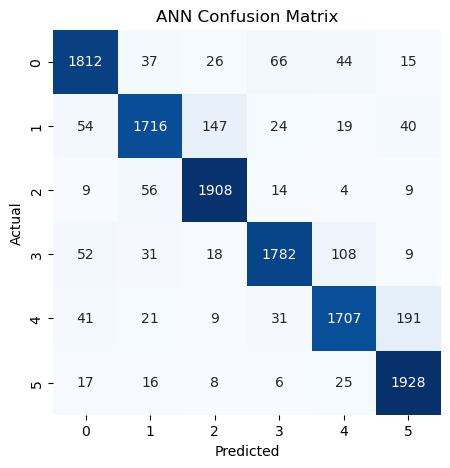

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
df_train = pd.read_csv('train_data_twitter2.csv')
df_train['text'] = df_train['text'].values.astype('U')

X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')
df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Convert text data to Bag-of-Words representation
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Epoch 1/5


609/609 [==============================] - 31s 44ms/step - loss: 0.5285 - accuracy: 0.8145 - val_loss: 0.2506 - val_accuracy: 0.9095
Epoch 2/5
609/609 [==============================] - 26s 42ms/step - loss: 0.2098 - accuracy: 0.9258 - val_loss: 0.2617 - val_accuracy: 0.9082
Epoch 3/5
609/609 [==============================] - 26s 42ms/step - loss: 0.1562 - accuracy: 0.9412 - val_loss: 0.2927 - val_accuracy: 0.9035
Epoch 4/5
609/609 [==============================] - 27s 44ms/step - loss: 0.1272 - accuracy: 0.9491 - val_loss: 0.3235 - val_accuracy: 0.9033
Epoch 5/5
609/609 [==============================] - 27s 44ms/step - loss: 0.1028 - accuracy: 0.9564 - val_loss: 0.4094 - val_accuracy: 0.9010
Test Accuracy: 0.9010000228881836
375/375 [==============================] - 2s 5ms/step
Confusion Matrix:
[[1821   27   30   65   43   14]
 [  53 1704  150   29   22   42]
 [  15   55 1917    6    4    3]
 [  57   20   26 1841   47    9]
 [  41   17   17  109 1631  185]
 [   9   

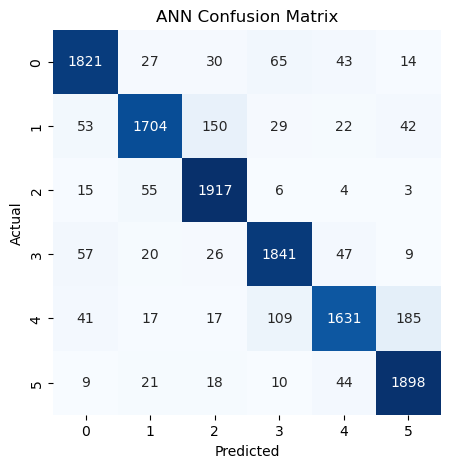

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()